In [1]:
%pylab inline
import io
import h5py 
import pandas as pd
import scipy as sp
import numpy as np
from PIL import Image
from fractions import Fraction
from scipy.stats import norm, chisquare, chi2_contingency, chi2
from scipy import optimize 
from scipy.optimize import curve_fit,least_squares
from lmfit.models import GaussianModel


Populating the interactive namespace from numpy and matplotlib


In [2]:
Distances = 13 # 13
shapes =['Rectangle','Halfway','Triangle','SiPM Trap']
Angles = len(shapes)
fileName = [[] for i in range(Angles)]
for i in range(Angles):
    for j in np.arange(0,Distances,1):
        prefix1 = 'LXe_T_'
        prefix2= '_nt_LXe_D_'
        csv ='.csv'
        i=i
        j=j
        fileName[i].append(f'{prefix1}{i}{prefix2}{j}{csv}')


In [3]:

x = arange(-3,3.5,0.5)*2.54
SiPM_dist = arange(0.5,7,0.5)
Angles = np.array([0,1,2,3])
dfs = []
for i in Angles:
    df = []
    for j in range(Distances):
        df.append(pd.read_csv(fileName[i][j], sep=',',header=None, skiprows=range(0,7),names=('Energy Deposited', 'SiPM Hits', 'Photons')))
    dfs.append(df)   
       

In [4]:
average =np.zeros((len(dfs),Distances))
DataZ = np.zeros((len(dfs),Distances,7))
for i in range(len(dfs)):
    for j in range(Distances):

        DataZ[i,j,0]=dfs[i][j]['Energy Deposited'].mean()
        DataZ[i,j,1]=dfs[i][j]['SiPM Hits'].mean()
        DataZ[i,j,2]=dfs[i][j]['Photons'].mean()
        DataZ[i,j,3]=DataZ[i,j,1]/DataZ[i,j,2]
        DataZ[i,j,4]= len(dfs[i][j])
        DataZ[i,j,5]= dfs[i][j].sum()[1]
        DataZ[i,j,6]= dfs[i][j].sum()[2]
        
data = DataZ
# data[i,j,k] # i = shape, j = distance, k = column of data
# k=0 -> Average Energy Deposit
# k=1 -> Average SiPM Hits
# k=2 -> Average photons
# k=3 -> Average SiPM hits / photons
# k=4 -> total scint hits
# k=5 -> total SiPM hits
# k=6 -> total photons

In [5]:
##  Summing all the distances per shape normalize to the rectangular detector
suumz = np.sum(data,axis=1)
normS = suumz[:,:]/suumz[0,:]

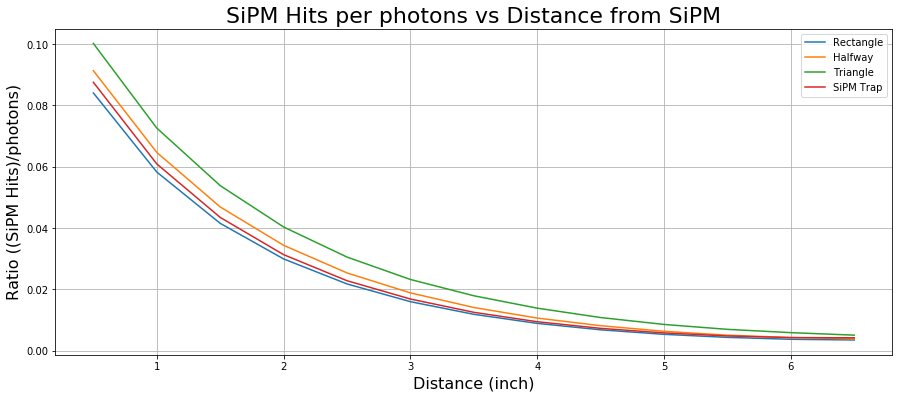

In [6]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('SiPM Hits per photons vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Ratio ((SiPM Hits)/photons)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,3], label =shapes[i])
    
legend()
show()

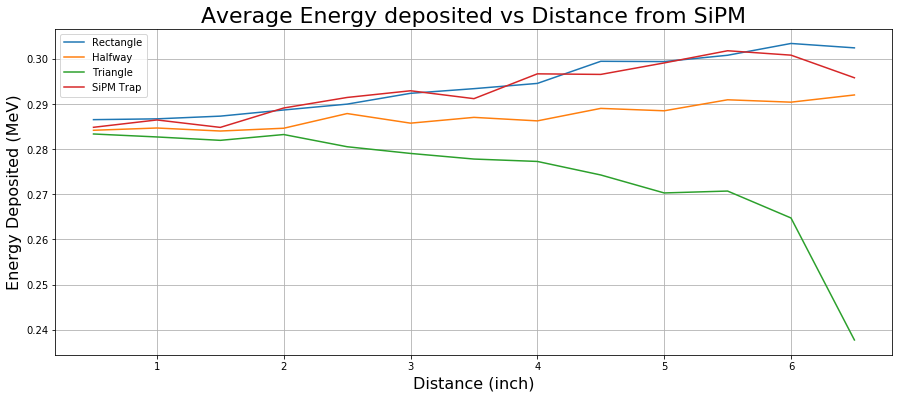

In [7]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('Average Energy deposited vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Energy Deposited (MeV)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,0], label = shapes[i])
    
legend()
show()

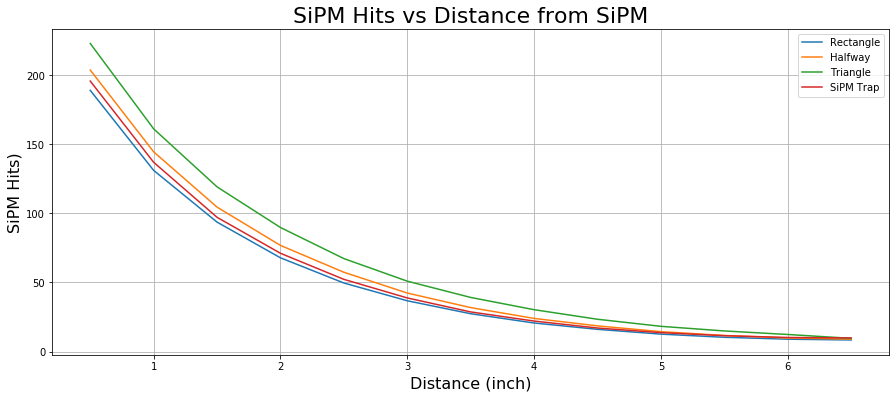

In [8]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('SiPM Hits vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('SiPM Hits)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,1], label =shapes[i])
    
legend()
show()

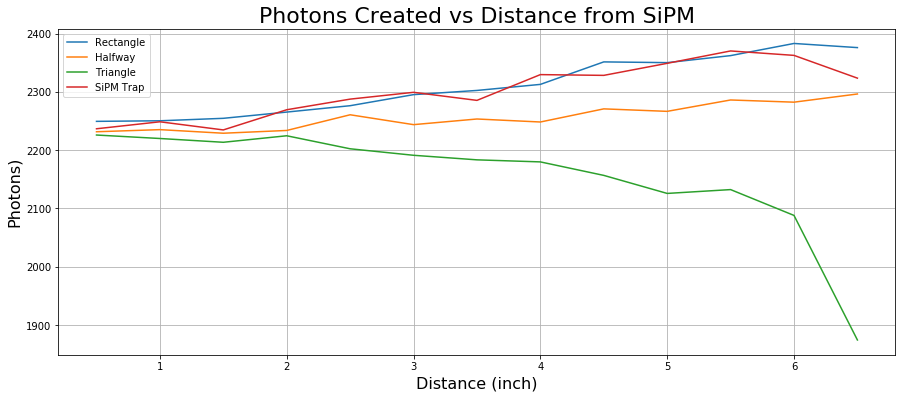

In [9]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('Photons Created vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Photons)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,2], label =shapes[i])
    
legend()
show()

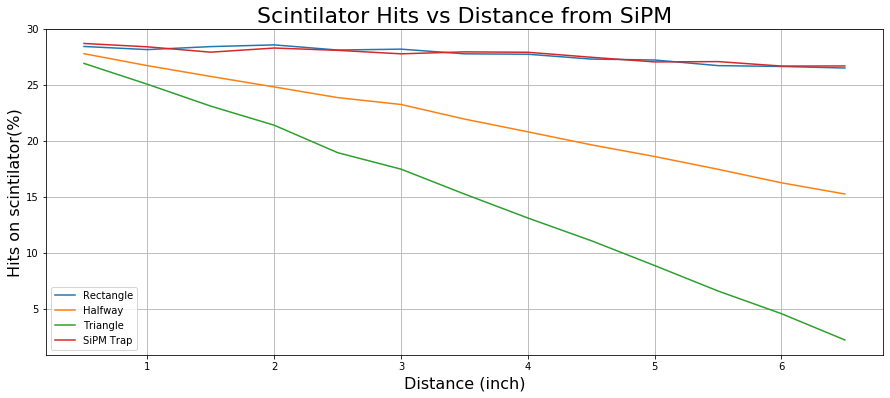

In [10]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('Scintilator Hits vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Hits on scintilator(%)',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,4]/1e3, label =shapes[i])
    
legend()
show()

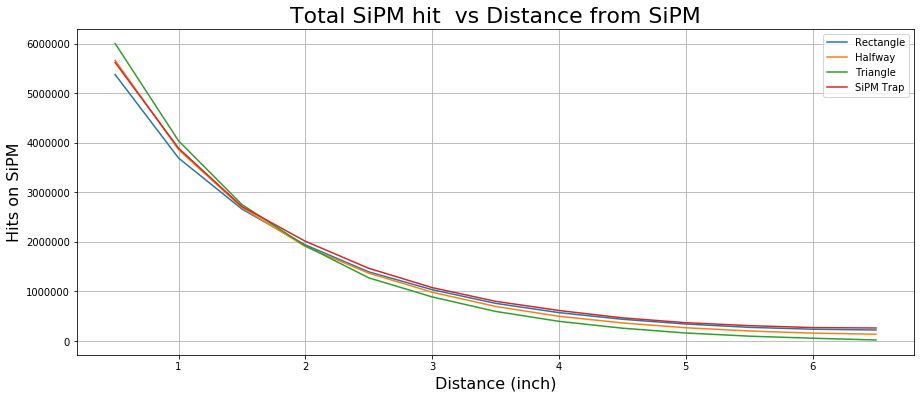

In [11]:
plt.figure(figsize=(15, 6))

plt.grid()
plt.title('Total SiPM hit  vs Distance from SiPM',fontsize=22)
plt.xlabel('Distance (inch)',fontsize=16)
plt.ylabel('Hits on SiPM',fontsize=16)

for i in range(len(dfs)):
     plot(SiPM_dist,data[i,:,5], label =shapes[i])
    
legend()
show()

In [12]:
# Rectangle to trianle shape parameters
b1 = np.arange(0,1.65,0.15) 
b2 = 1.5
h = 7
theta = arctan(b1/7)*180/pi
volume_cu_in = np.flip(0.5*(b1+b2)*h)
Distance = np.arange(-3,3,0.5)*2.54


In [13]:
# #Histograms
# bins = 256
# counts = np.zeros((4,bins,))
# bcs = np.zeros((4,bins)) #bin centers
# for i in range(4):
#     be = np.linspace(min(data[:,i,0]), max(data[:,i,0]), bins+1)
#     bc = be[:-1] + np.diff(be) / 2.
#     count, _ = np.histogram(data[:,i,0], bins = bins)
#     counts[i,:]= count
#     bcs[i,:]= bc
